In [32]:
###Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
##fetching data
data=pd.read_csv("admission.csv")
factors=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
data1=data.drop(['Serial No.'],axis=1)
print(data1.head())
print(data1.describe())

   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65  
        GRE Score  TOEFL Score  University Rating         SOP        LOR   \
count  400.000000   400.000000         400.000000  400.000000  400.000000   
mean   316.807500   107.410000           3.087500    3.400000    3.452500   
std     11.473646     6.069514           1.143728    1.006869    0.898478   
min    290.000000    92.000000           1.000000    1.000000    1.000000   
25%    308.000000   103.000000  

In [57]:
##handling missing values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(factors[:,:])
print(factors)
print(type(factors))
factors=np.delete(factors,0,1)
print(factors.shape)

[[  1.   337.   118.   ...   4.5    9.65   1.  ]
 [  2.   324.   107.   ...   4.5    8.87   1.  ]
 [  3.   316.   104.   ...   3.5    8.     1.  ]
 ...
 [398.   330.   116.   ...   4.5    9.45   1.  ]
 [399.   312.   103.   ...   4.     8.78   0.  ]
 [400.   333.   117.   ...   4.     9.66   1.  ]]
<class 'numpy.ndarray'>
(400, 7)


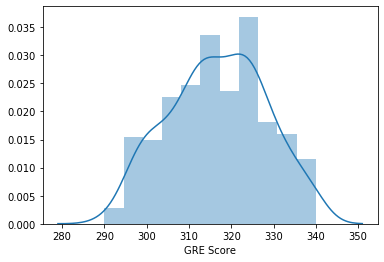

In [58]:
##gre scores in the considered sample.
sns.distplot(data1["GRE Score"])

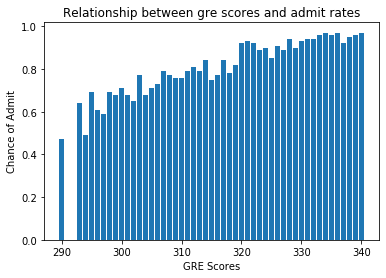

In [59]:
plt.bar(data1["GRE Score"],y)
plt.xlabel("GRE Scores")
plt.ylabel("Chance of Admit")
plt.title("Relationship between gre scores and admit rates")
plt.show()

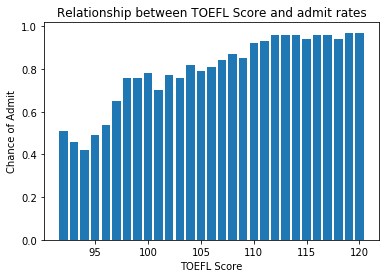

In [60]:
plt.bar(data1["TOEFL Score"],y)
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")
plt.title("Relationship between TOEFL Score and admit rates")
plt.show()

In [61]:
##splitting of training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(factors,y,test_size=0.25,random_state=0)

In [62]:
##Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)
y_pred=linear_reg.predict(x_test)


In [63]:
##Comparing first 25 actual and predicted values.
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)


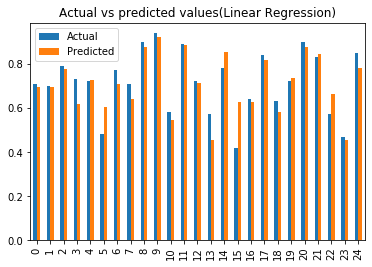

In [64]:
df1.plot(kind='bar')
plt.title("Actual vs predicted values(Linear Regression)")
plt.show()

In [65]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.049113635308591766
Mean Squared Error: 0.004801498976816873
Root Mean Squared Error: 0.06929284939167152


In [66]:
##Creating support vector regression model
from sklearn.svm import SVR
svr_reg=SVR()
##y_train=y_train.astype('float')
svr_reg.fit(x_train,y_train)
y_pred1=svr_reg.predict(x_test)
##print(y_pred1)

C:\Users\varsh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.0, 'Actual vs predicted values(Support Vector Machine)')

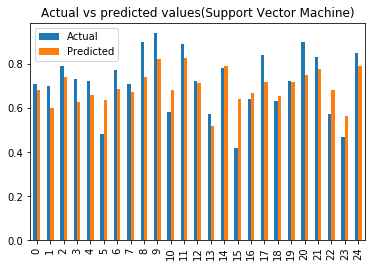

In [67]:
svr_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred1})
svr_df2=svr_df.head(25)
svr_df2.plot(kind='bar')
plt.title("Actual vs predicted values(Support Vector Machine)")

In [68]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 0.08068194143633889
Mean Squared Error: 0.00917427096122418
Root Mean Squared Error: 0.09578241467630778


In [69]:
##Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred2=dtr.predict(x_test)

Text(0.5, 1.0, 'Actual vs predicted values(Decision Tree)')

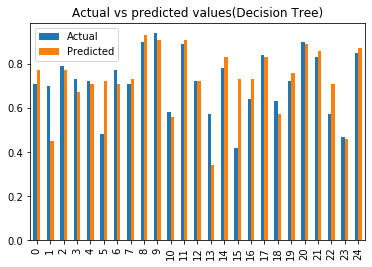

In [70]:
dtr_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred2})
dtr_df2=dtr_df.head(25)
dtr_df2.plot(kind='bar')
plt.title("Actual vs predicted values(Decision Tree)")

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 0.0741
Mean Squared Error: 0.011138999999999996
Root Mean Squared Error: 0.10554146104730594


In [72]:
##Random Forest
from sklearn.ensemble import RandomForestRegressor
rand_reg=RandomForestRegressor(n_estimators=150,random_state=0)
rand_reg.fit(x_train,y_train)
randy_pred=rand_reg.predict(x_test)

Text(0.5, 1.0, 'Actual vs predicted values(Random Forest Regression)')

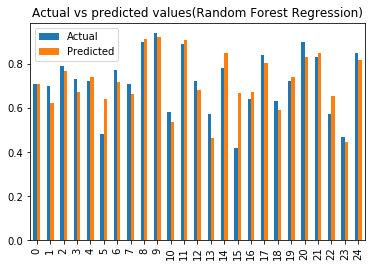

In [73]:
rdf_df=pd.DataFrame({'Actual':y_test,'Predicted':randy_pred})
rdf_df2=rdf_df.head(25)
rdf_df2.plot(kind='bar')
plt.title("Actual vs predicted values(Random Forest Regression)")

In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, randy_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, randy_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, randy_pred)))

Mean Absolute Error: 0.05427200000000007
Mean Squared Error: 0.005979835644444455
Root Mean Squared Error: 0.07732939702625681


In [75]:
###Comparing the accuarcy of the models.
from sklearn.metrics import r2_score
da=[['Linear',r2_score(y_test,y_pred)],['SVM',r2_score(y_test,y_pred1)],['Decision Tree',r2_score(y_test,y_pred2)],
    ['Random Forest',r2_score(y_test,randy_pred)]]
accuracy=pd.DataFrame(da,columns=['Model','Accuracy'])

In [76]:
print(accuracy)

           Model  Accuracy
0         Linear  0.724863
1            SVM  0.474293
2  Decision Tree  0.361710
3  Random Forest  0.657342


In [54]:
##From the above data we can see that maximum accuracy is provided by Linear regreesion model 
##and the lowest is provided by Support Vector machines.

In [83]:
##Enter the data accordingly to odbtain predictions
##trial=input("Enter trial number=")
gre=input("Enter GRE score=")
toefl=input("Enter TOEFL score=")
ranking=input("Enter University ranking=")
sop=input("Enter SOP score(in scale of 5)=")
lor=input("Enter LOR score(in scale of 5)=")
cgpa=input("Enter CGPA score(in scale of 10)=")
research=input("Enter if the student has done any research(if yes type 1 else type 0)=")
new_data=pd.DataFrame([gre,toefl,ranking,sop,lor,cgpa,research])
new_data=new_data.values.reshape(1,-1)
print(new_data)
print(type(new_data))
print(new_data.shape)
predicted=linear_reg.predict(new_data)


Enter GRE score=292
Enter TOEFL score=92
Enter University ranking=2
Enter SOP score(in scale of 5)=3
Enter LOR score(in scale of 5)=3
Enter CGPA score(in scale of 10)=7.5
Enter if the student has done any research(if yes type 1 else type 0)=0
[['292' '92' '2' '3' '3' '7.5' '0']]
<class 'numpy.ndarray'>
(1, 7)


In [85]:
print("The probability of getting an admit in the university is=")
print(predicted)

The probability of getting an admit in the university is=
[0.47286608]


In [86]:
print("The predictions might vary based on the factors of project done, work experience and so on. This obtained prediction is an probable estimate.")

The predictions might vary based on the factors of project done, work experience and so on. This obtained prediction is an probable estimate.


In [87]:
print("It is an effort done to obtain a rough summary about the major contributing factors.")

It is an effort done to obtain a rough summary about the major contributing factors.
